In [1]:
import os
import warnings

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9358 - loss: 0.2186 - val_accuracy: 0.9820 - val_loss: 0.0611
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0588 - val_accuracy: 0.9870 - val_loss: 0.0480
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.9885 - val_loss: 0.0397
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9895 - val_loss: 0.0373
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0235 - val_accuracy: 0.9865 - val_loss: 0.0428


Predictions on training images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


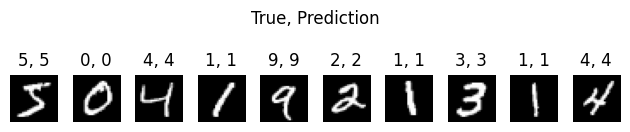

In [4]:
print("Predictions on training images:")

imgs = []
titles = []
for i in range(10):
    img = x_train[i]
    true = y_train[i]
    pred = np.argmax(model.predict(img.reshape(1, 28, 28, 1)))
    imgs.append(img.squeeze())
    titles.append(f"{true}, {pred}")

fig, axes = plt.subplots(1, 10)
for ax, img, title in zip(axes, imgs, titles):
	ax.imshow(img, cmap="gray")
	ax.set_title(title)
	ax.axis("off")
plt.suptitle("True, Prediction", y=0.65)
plt.tight_layout()
plt.show()

Predictions on noisy images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


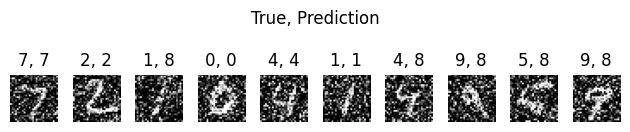

In [5]:
print("Predictions on noisy images:")
imgs = []
titles = []
for i in range(10):
    img = x_test[i]
    noisy_img = img + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    noisy_img = np.clip(noisy_img, 0.0, 1.0)
    true = y_test[i]
    pred = np.argmax(model.predict(noisy_img.reshape(1, 28, 28, 1)))
    imgs.append(noisy_img.squeeze())
    titles.append(f"{true}, {pred}")

fig, axes = plt.subplots(1, 10)
for ax, img, title in zip(axes, imgs, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
plt.suptitle("True, Prediction", y=0.65)
plt.tight_layout()
plt.show()